En este proyecto hemos intentado predecir la lesividad dado un accidente en la ciudad de Madrid, clasificándolo en Ileso (IL), Herido Leve(HL), Herido Grave (HG) o Muerte (MT). Para ello, hemos hecho varios modelos de Machine Learning(ML) y de Deep Learning (DL).

# ANÁLISIS EXPLORATORIO (EDA)

Antes de entrar a modelar, tuvimos que trabajar con los datasets encontrados para intentar dejarlos lo más "legibles" posible. Para ello, hemos graficado, borrado y creado nuevas features, eliminado outliers y , sobre todo, hemos tenido que realizar varias codificaciones, ya que teníamos muchas variables categóricas.

Nuestros datasets los hemos enriquecido cruzándolos con la posición de los radares fijos y la posición de lugares de ocio, ya que queríamos estudiar si dichas features eran importantes o no a la hora de la predicción.

Una vez concluido esta parte del análisis, tenemos nuestro dataset de test y training:


Dimensiones del dataset de training: (144069, 24)

Dimensiones del dataset de test: (35959, 24)

# MACHINE LEARNING

Ya con el dataset preparado, hemos creado los siguientes algoritmos, con sus consiguientes resultados en cuanto al accuracy,
 que es la métrica utilizada para la predicción:

-LASSO: Usada como selección de características 

-REGRESIÓN LOGÍSTICA: El sistema más sencillo de clasificación.

Precisión Regresión Logística: 0.630885174782391

-KNN (vecinos más próximos) : Este método supone una mejor clasificación entre los vecinos más cercanos. Nuestra accuracy es 
    bastante pobre (puede que sea por la similitud de muchos datos lo cuál haría que no "acertara" con el dato a trabajar).
    
Precisión Vecinos más Cercanos: 0.5211490864595789

-ÁRBOLES DE DECISIÓN : Este método ya es algo más complejo, introduciendo un factor de profundidad que es calculado mediante Grid Search CV. A pesar de ser más complejo, tiene un factor importante de error, dado que jugamos con muchos parámetros a la vez que intentamos que el coste computacional sea menor.

Precisión Árboles de Decisión Clasificación: 0.6167023554603854

-RANDOM FOREST : Este método es un caso particular del árbol de decisión con árboles aleatorios, siendo el método que mejor suele funcionar. Lo hemos usado como selector de características para vovler a probarlo sin las features dropeadas, siendo el resultado muy similar

Precisión Random Forest Clasificación: 0.6852248394004282 / 0.6841958897633416
Precisión Random Forest Clasificación(con selección de características): 0.6751300091771184



# DEEP LEARNING

Al igual que en ML, hemos probado dos modelos para ver su accuracy. En el primero :

def create_mlp(data,regress =False):
    model=Sequential()
    model.add(Dense(256, input_dim=data, activation="relu",kernel_regularizer=l2(0.01)))
    model.add(Dense(96, input_dim=data, activation="relu"))
    model.add(Dense(48, input_dim=data, activation="relu"))
    model.add(Dense(12, input_dim=data, activation="relu"))
    model.add(Dense(4, input_dim=data, activation="softmax"))
    
tenemos un regularizador L2 ( usado siempre para penalizar lo máximo posible las funciones de coste ) teniendo siempre como salida 4 neuronas con una activación "softmax" .

En el segundo modelo:

def create_mlp2(data,regress =False):
    model=Sequential()
    model.add(Dense(128, input_dim=data, activation="relu",kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(48, input_dim=data, activation="relu"))
    model.add(Dense(12, input_dim=data, activation="relu"))
    model.add(Dense(4, input_dim=data, activation="softmax"))

    
 vemos como metemos un Dropout de 0.5 y alguna modificación más, teniendo resultados muy similares.
 

# CONCLUSIÓN 

Vemos que las features más importantes a la hora de nuestra predicción son las que hacen referencia al tipo de vehículo (es lógico pensar que una accidente es más peligroso si vas en Bicicleta que en Camión), tipo de accidente , lugar de accidente ( será más peligroso mientras más grande sea la calle ya que posiblemente irá a más velocidad ).

Resulta interesante mencionar que también aparece como factor de importancia el Sexo ( mejor no saber por qué...) y el tramo de edad. Sin embargo ninguna feature relacinada con el tiempo o la calzada parecen demasiado importantes.


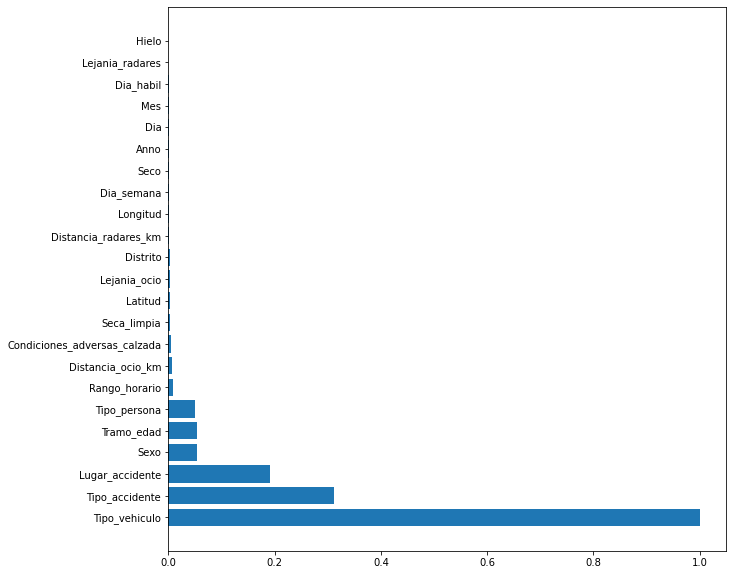

En cuanto a la tecnología , creemos que es un problema perfectamente asumible con algoritmos de ML, haciéndolo más sencillo computacionalmente que con DL. 